In [2]:
#Optionally setting the working directory to the relevant folder

import os

os.chdir("/Users/EagleFace/Documents/Loan_Data")
os.getcwd()



'/Users/EagleFace/Documents/Loan_Data'

In [3]:
#1.) Pick your data set

#This data set contains loan data from Lending Club for the years 2008-2011. 
#There is a large matrix of data for accepted loans and how they turned out over time,
#and a smaller matrix for rejected loans. A third matrix is included, which is the
#data dictionary. 

#Reading in and peeking at the data dictionary

import pandas as pd

data_d = pd.read_excel("LCDataDictionary.xlsx") # data dictionary

data_d.iloc[[40]]  # sample row


,LoanStatNew,Description
40,last_pymnt_d,Last month payment was received


In [4]:
data = pd.read_csv("LoanStats3a.csv", skiprows = 1, low_memory = False)

data.head(5)  # first 5 of the main matrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_r = pd.read_csv("/Users/EagleFace/Documents/Loan_Data/RejectStatsA.csv", skiprows=1, low_memory = False, )

data_r.head(5)  # first 5 of the rejection matrix

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [6]:
#2.) a. "Can you count something interesting"


#Sure- we can count up the number of total loans in each matrix, 
#as well as the number of columns in each matrix.

print("Number of loans in main matrix:", len(data.index))
print("Number of factors in main matrix:", len(data.columns))


Number of loans in main matrix: 42538
Number of factors in main matrix: 145


In [7]:
print("Number of loans in rejection matrix:", len(data_r.index))
print("Number of factors in rejection matrix:", len(data_r.columns))

Number of loans in rejection matrix: 755491
Number of factors in rejection matrix: 9


In [8]:
#2.) b. "Can you find some trends 
#(high, low, increase, decrease, anomalies)? 

#To start, we can look at the high and low of 
#debt-to-income ratio in data_r. 

data_r['Debt-To-Income Ratio'].max()

'99999%'

In [9]:
data_r['Debt-To-Income Ratio'].min()

'-1%'

In [67]:
#Clearly there's a wide range in this ratio 
#and it's interesting to note it's -1:99,999.
#Further analysis will be needed to see
#whether this data is affected by an outlier.



In [16]:
#To find any increase or decrease, 
#we have to arrange the data by date.

data_d.loc[data_d['LoanStatNew'] == 'issue_d']


,LoanStatNew,Description
35,issue_d,The month which the loan was funded


5000    Oct-2011
5001    Oct-2011
5002    Oct-2011
5003    Nov-2011
5004    Oct-2011
5005    Oct-2011
5006    Oct-2011
5007    Oct-2011
5008    Oct-2011
5009    Oct-2011
5010    Oct-2011
5011    Oct-2011
5012    Oct-2011
5013    Oct-2011
5014    Oct-2011
5015    Oct-2011
5016    Oct-2011
5017    Oct-2011
5018    Oct-2011
5019    Oct-2011
Name: issue_d, dtype: object

In [19]:
#Attempting to change the type to a datetime object
time_format = '%Y-%m-%d %H:%M'
data_r.iloc[:,1] = pd.to_datetime(data_r.iloc[:,1], format = time_format)


In [20]:
type(data_r.iloc[5,1])

pandas.tslib.Timestamp

In [34]:
#This timestamp data will go into a special matrix
#that is cleaned for graphing

#df = pd.DataFrame(data_r.iloc[:,1], columns=['date'])
#df.set_index('date', drop=False, inplace=True)
#df.groupby(pd.TimeGrouper(freq=))
chunk1 = pd.Series(data_r.iloc[:,1])
chunk1.head()


0   2007-05-26
1   2007-05-26
2   2007-05-27
3   2007-05-27
4   2007-05-27
Name: Application Date, dtype: datetime64[ns]

In [38]:
#Creates the time column 
df = pd.DataFrame(data = chunk1)


Index(['Application Date'], dtype='object')

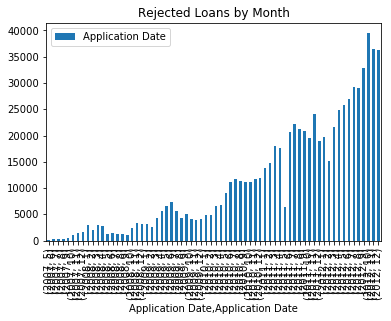

In [45]:
import matplotlib.pyplot as plt

df.groupby([df["Application Date"].dt.year, df["Application Date"].dt.month]).count().plot(kind="bar")
plt.title("Rejected Loans by Month")
plt.show()

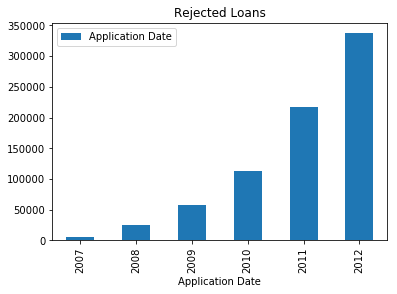

In [44]:
#Above the data is pretty cluttered since we have so many months
#so below we can use bigger 'bin' sizes and get a nicer graph

df.groupby([df["Application Date"].dt.year]).count().plot(kind="bar")
plt.title("Rejected Loans")
plt.show()

In [55]:
#Let's take a look at the main matrix and see
#if we see the same skewed-left pattern
chunk2 = data.iloc[:,15]
print(chunk2)

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
5        Dec-2011
6        Dec-2011
7        Dec-2011
8        Dec-2011
9        Dec-2011
10       Dec-2011
11       Dec-2011
12       Dec-2011
13       Dec-2011
14       Dec-2011
15       Dec-2011
16       Dec-2011
17       Dec-2011
18       Dec-2011
19       Dec-2011
20       Dec-2011
21       Dec-2011
22       Dec-2011
23       Dec-2011
24       Dec-2011
25       Dec-2011
26       Dec-2011
27       Dec-2011
28       Dec-2011
29       Dec-2011
           ...   
42508    Jul-2007
42509    Jul-2007
42510    Jul-2007
42511    Jul-2007
42512    Jul-2007
42513    Jun-2007
42514    Jun-2007
42515    Jun-2007
42516    Jun-2007
42517    Jun-2007
42518    Jun-2007
42519    Jun-2007
42520    Jun-2007
42521    Jun-2007
42522    Jun-2007
42523    Jun-2007
42524    Jun-2007
42525    Jun-2007
42526    Jun-2007
42527    Jun-2007
42528    Jun-2007
42529    Jun-2007
42530    Jun-2007
42531    Jun-2007
42532    J

In [93]:
chunk2 = chunk2.str.split('-',expand=True)

In [94]:
chunk2 = chunk2.iloc[:,1]

#chunk2 = pd.to_datetime(chunk2, format = time_format)



IndexError: single positional indexer is out-of-bounds

In [66]:
#Must match these to data in the main loan matrix
data_r.columns

#Some of these are not relevant such as 'policy code',
#note that zip code is redacted and thus unusable

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [68]:
#Column names for main loan data frame, 'data'
list(data)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [70]:
#To understand this data we need to be able to compare 
#the two matrices. Below is a list of the relevant pairs of the two
data_col_pairs = {'Amount Requested':'loan_amnt',
                  'Application Date':'issue_d',
                  'Loan Title':'title',
                  'Risk_Score':'unknown / sub_grade could be closest correlate',
                  'Debt-To-Income Ratio':'dti',
                  'Zip Code':'zip_code',
                  'State':'addr_state',
                  'Employment Length':'emp_length',
                  'Policy Code':'policy_code'  # blank
                 }

In [73]:
#as we can see the zip code is partially redacted.
data_r.loc[:,'Zip Code'].head()

0    481xx
1    010xx
2    212xx
3    017xx
4    209xx
Name: Zip Code, dtype: object

In [78]:
data_r.loc[:,'Policy Code'].head()
#as we can see 'policy code is left blank presumably for client privacy

0    0
1    0
2    0
3    0
4    0
Name: Policy Code, dtype: int64

In [75]:
#Next we can compare emplyment lenght data formats

data_r.loc[:,'Employment Length'].head()


0     4 years
1    < 1 year
2      1 year
3    < 1 year
4    < 1 year
Name: Employment Length, dtype: object

In [77]:
data.loc[:,'emp_length'].head()
#appears to be matching quasi-numerical categorical data

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [80]:
#In what format is the data_r risk score data?
data_r.loc[:,'Risk_Score'].head()

#This looks like it could be actual FICO credit score data. 
#It remains to be seen whether this is the bank's own internal scoring system
#or the FICO score. 

0    693.0
1    703.0
2    715.0
3    698.0
4    509.0
Name: Risk_Score, dtype: float64

In [82]:
data.loc[:,'grade'].head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [83]:
data.loc[:,'sub_grade'].head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [84]:
data.loc[:,'dti'].head()

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

In [85]:
#Confirming dti means debt to income ratio
data_d.loc[data_d['LoanStatNew'] == 'dti']

,LoanStatNew,Description
16,dti,A ratio calculated using the borrower’s total ...


In [86]:
data.loc[:,'dti'].min()

0.0

In [87]:
#The dti ratio of the highest accepted loan. 
data.loc[:,'dti'].max()

29.989999999999998

In [ ]:
#Next steps: 

#1. explore variable pairs with high correlation coefficients
#and generally look for predictive-grade variable pairs
#2. finish cleaning main 'data' matrix for dates and 
#use calendar library to convert the string month names
#to valid datetime format soas to group the main loan data matrix
#by month to see if there are any time-based changes in correlations for variable pairs
